In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1985.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1985,17527,311,28,3514
1,1985,17131,367,40,3543
2,1985,17183,270,17,3550
3,1985,17254,109,40,3514
4,1985,17460,236,21,3549
...,...,...,...,...,...
1864,1985,17675,329,16,3520
1865,1985,17863,29,13,3515
1866,1985,17557,238,34,3497
1867,1985,17462,310,14,3526


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1869, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1869 non-null   int64
 1   Maximum length (m))  1869 non-null   int64
 2   Recession(m),        1869 non-null   int64
 3   Rate/yr(m)           1869 non-null   int64
 4   Snout altitude (m)   1869 non-null   int64
dtypes: int64(5)
memory usage: 73.1 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1869


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1985,17527,311,28,3514
1,1985,17131,367,40,3543
2,1985,17183,270,17,3550
3,1985,17254,109,40,3514
4,1985,17460,236,21,3549


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0591,-0.0367,-0.0068
"Recession(m),",NaN,-0.0591,1.0000,-0.0471,0.0143
Rate/yr(m),NaN,-0.0367,-0.0471,1.0000,0.0210
Snout altitude (m),NaN,-0.0068,0.0143,0.0210,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)    -0.0068
Rate/yr(m)            -0.0367
Recession(m),         -0.0591
Year                      NaN
Name: Maximum length (m)), dtype: float64

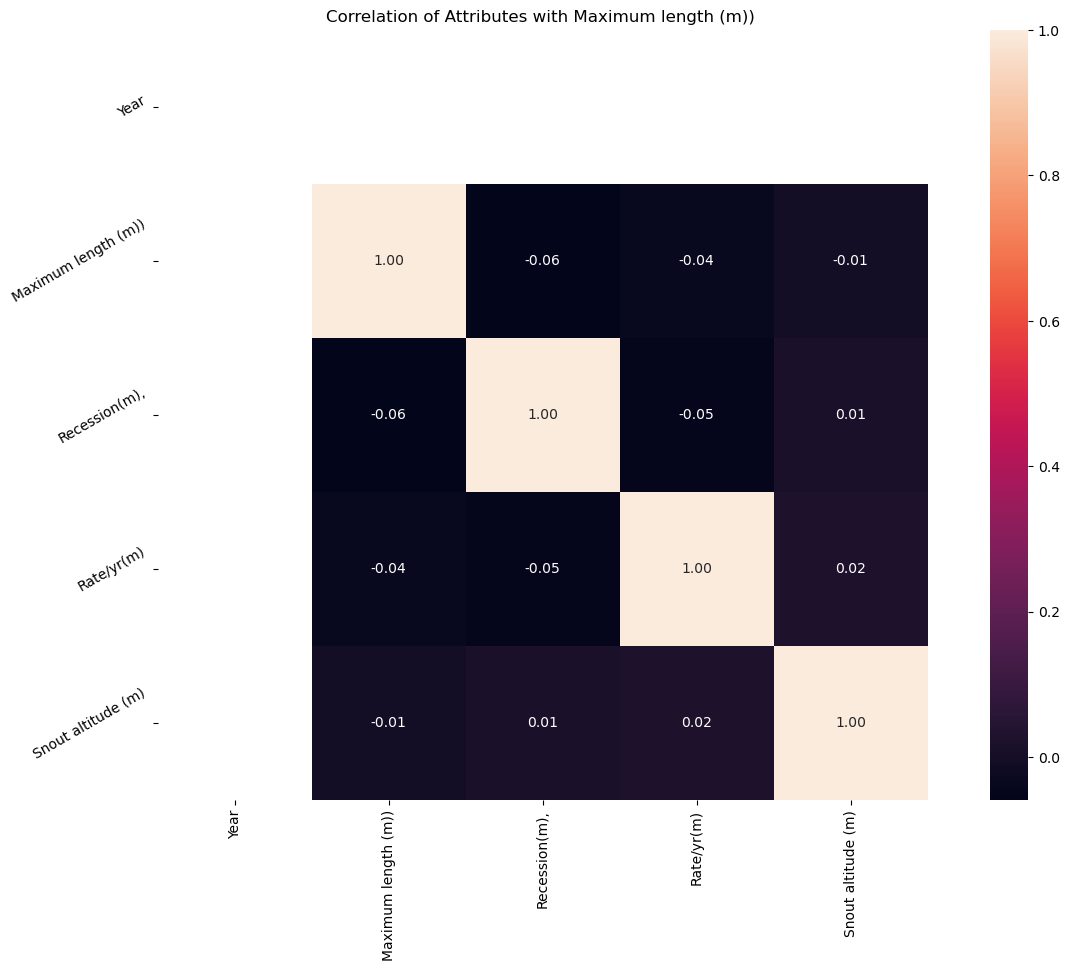

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,869.0000","1,869.0000","1,869.0000","1,869.0000","1,869.0000"
mean,"1,985.0000","17,547.4141",218.8159,27.4478,"3,531.7041"
std,0.0000,293.4487,126.4882,8.4818,20.5705
min,"1,985.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,985.0000","17,296.0000",111.0000,20.0000,"3,514.0000"
50%,"1,985.0000","17,555.0000",219.0000,28.0000,"3,532.0000"
75%,"1,985.0000","17,785.0000",325.0000,34.0000,"3,549.0000"
max,"1,985.0000","18,066.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1985   1.0000
Name: count, dtype: float64

Recession(m),
174   0.0059
35    0.0054
136   0.0054
310   0.0054
128   0.0048
       ...  
337   0.0005
185   0.0005
27    0.0005
123   0.0005
23    0.0005
Name: count, Length: 433, dtype: float64

Rate/yr(m)
30   0.0433
24   0.0423
31   0.0423
19   0.0407
33   0.0407
18   0.0380
32   0.0358
29   0.0353
28   0.0348
13   0.0348
21   0.0342
35   0.0332
34   0.0326
40   0.0326
37   0.0326
17   0.0326
41   0.0321
16   0.0316
14   0.0310
36   0.0305
27   0.0305
23   0.0305
20   0.0300
25   0.0300
42   0.0294
39   0.0289
22   0.0278
38   0.0278
26   0.0273
15   0.0268
Name: count, dtype: float64

Snout altitude (m)
3543   0.0214
3519   0.0209
3541   0.0203
3514   0.0198
3546   0.0193
        ...  
3534   0.0096
3554   0.0096
3517   0.0091
3531   0.0091
3496   0.0005
Name: count, Length: 72, dtype: float64



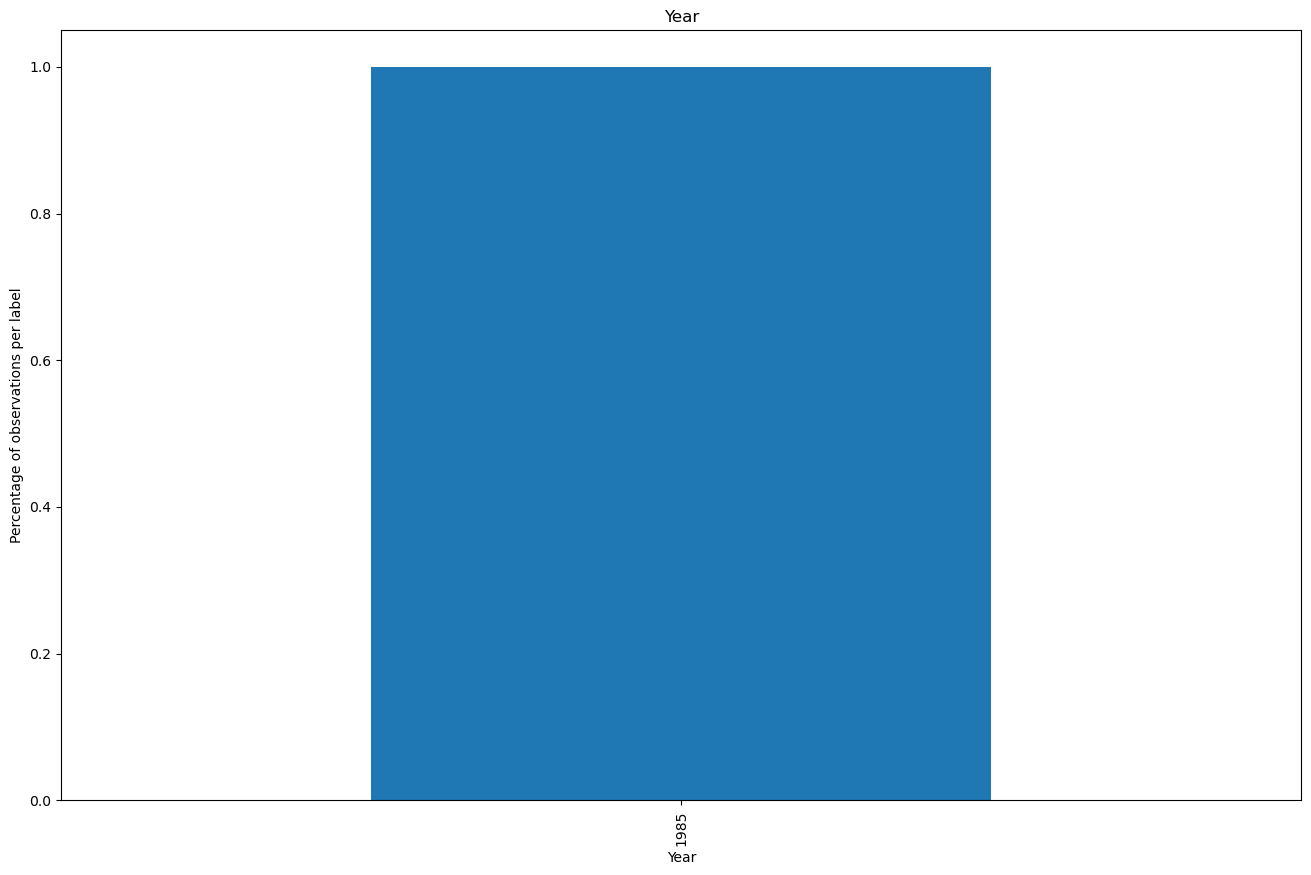

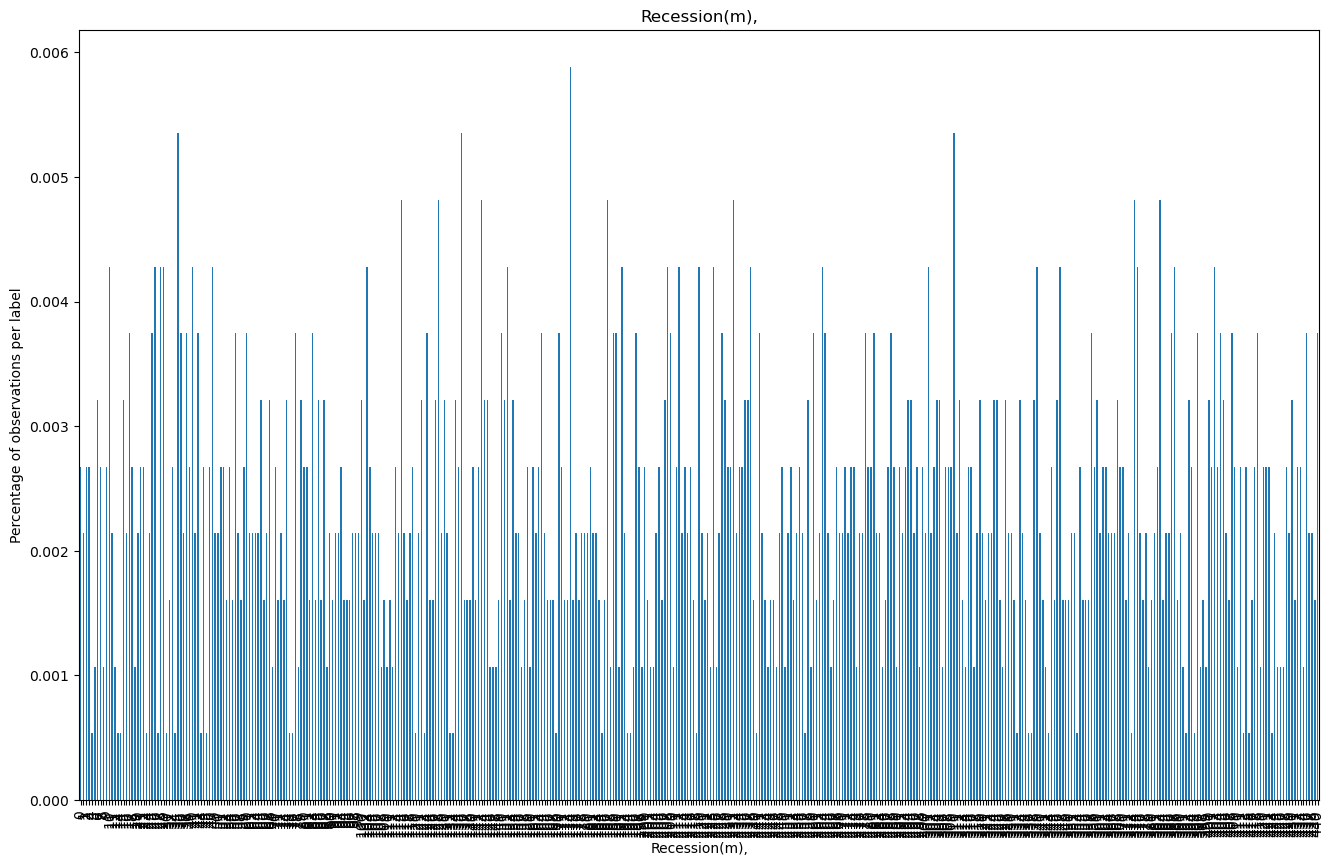

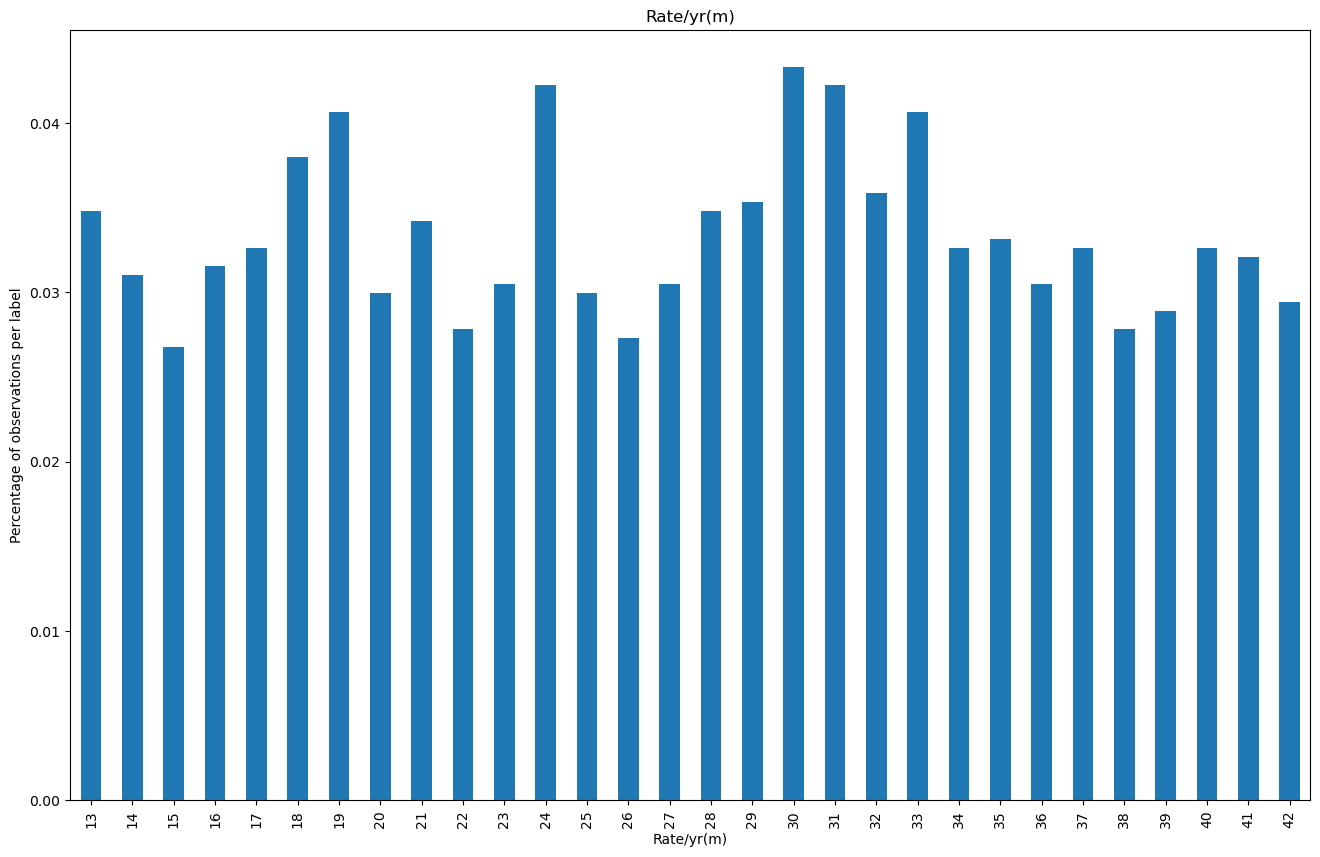

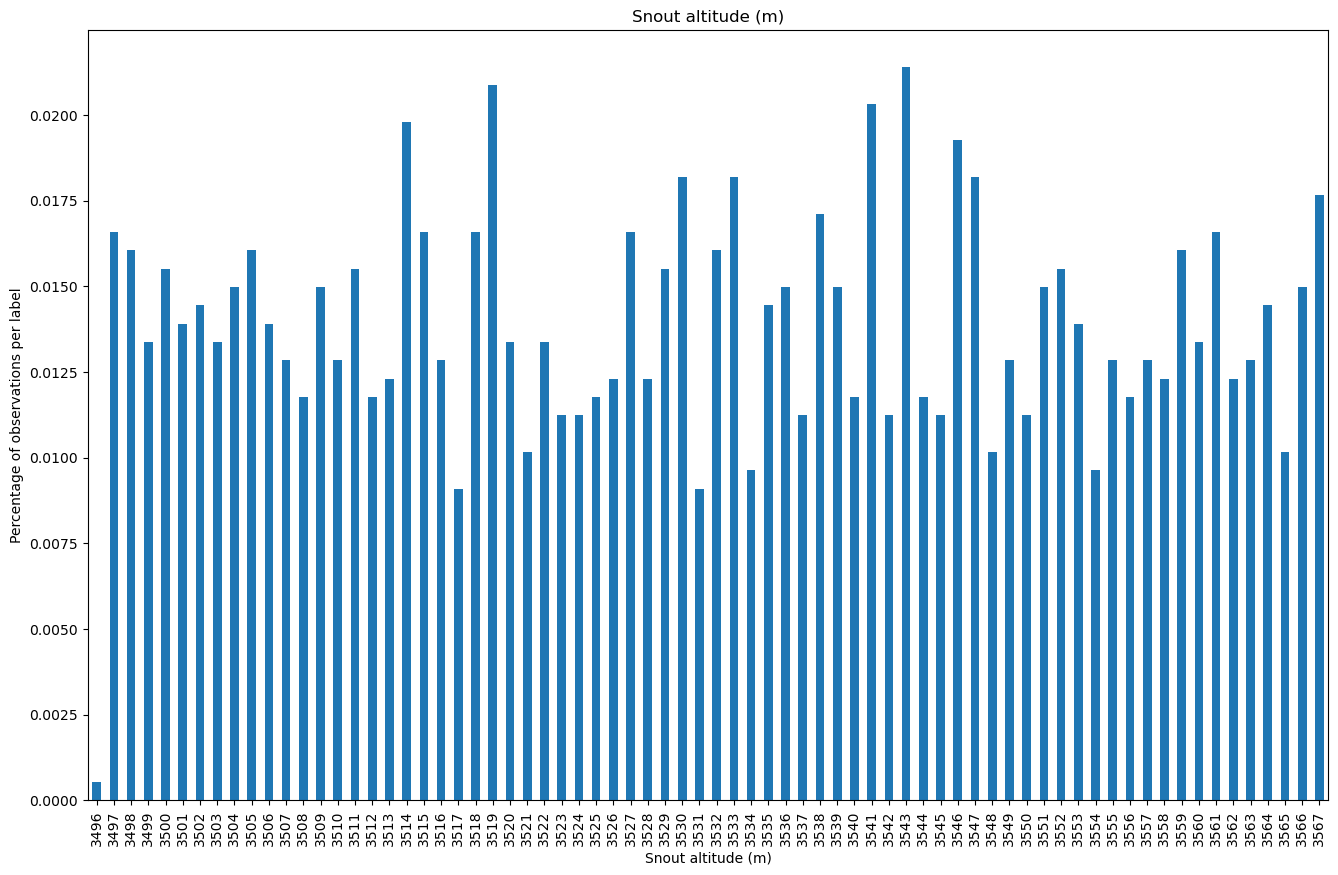

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()